# Previsão de valores do aluguel de imóveis no município de São Paulo

In [14]:
import pandas as pd

In [15]:
df_imoveis = pd.read_csv('./dados/data.csv')
df_imoveis

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200


## Análise dos dados

In [16]:
df_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [17]:
df_imoveis.describe()

,area,bedrooms,garage,rent,total
count,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000
mean,84.655658,1.966286,1.060393,3250.814789,4080.030625
std,74.020536,0.931313,1.132349,2650.711557,3352.480274
min,0.000000,0.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1590.000000,1996.000000
50%,60.000000,2.000000,1.000000,2415.000000,3057.000000
75%,96.000000,3.000000,2.000000,3800.000000,4774.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000


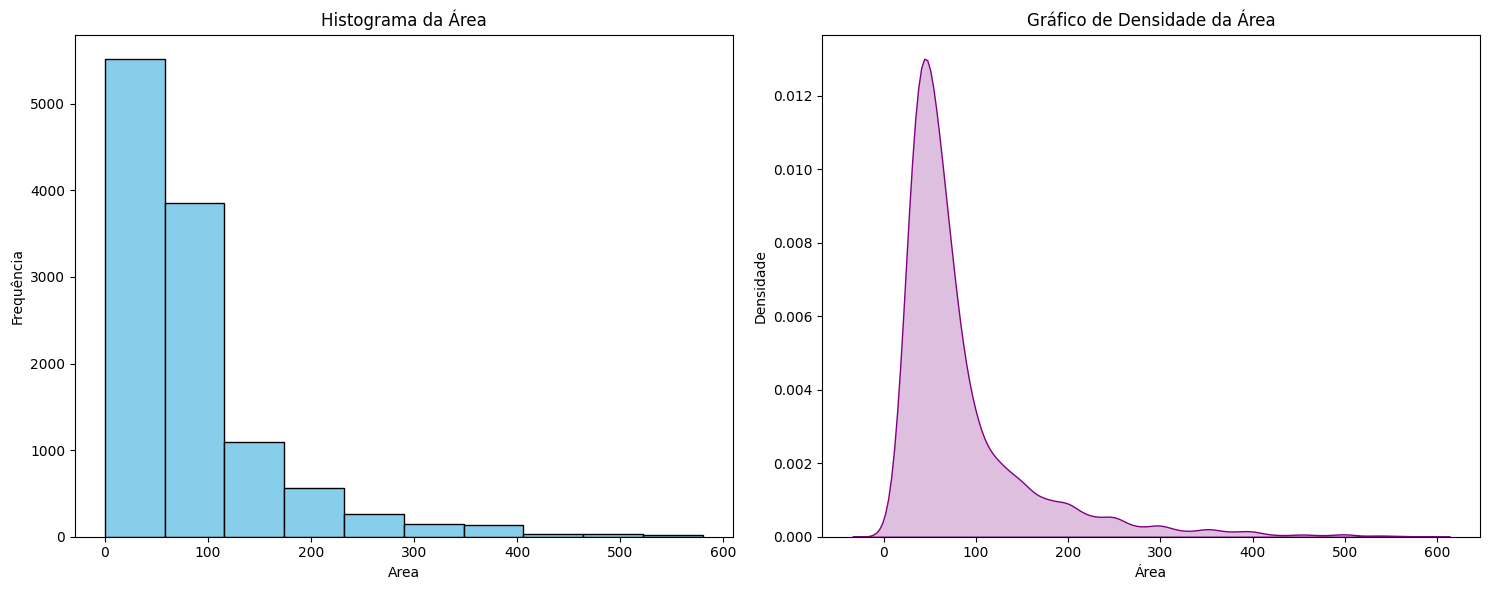

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histograma (usando Matplotlib)
axes[0].hist(df_imoveis.area, bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('Histograma da Área')
axes[0].set_xlabel('Area')
axes[0].set_ylabel('Frequência')

# Gráfico de Densidade (KDE Plot - usando Seaborn)
sns.kdeplot(data=df_imoveis, x='area', fill=True, color='purple', ax=axes[1])
axes[1].set_title('Gráfico de Densidade da Área')
axes[1].set_xlabel('Área')
axes[1].set_ylabel('Densidade')

plt.tight_layout()
plt.show()


count    11657.000000
mean        84.655658
std         74.020536
min          0.000000
25%         40.000000
50%         60.000000
75%         96.000000
max        580.000000
Name: area, dtype: float64

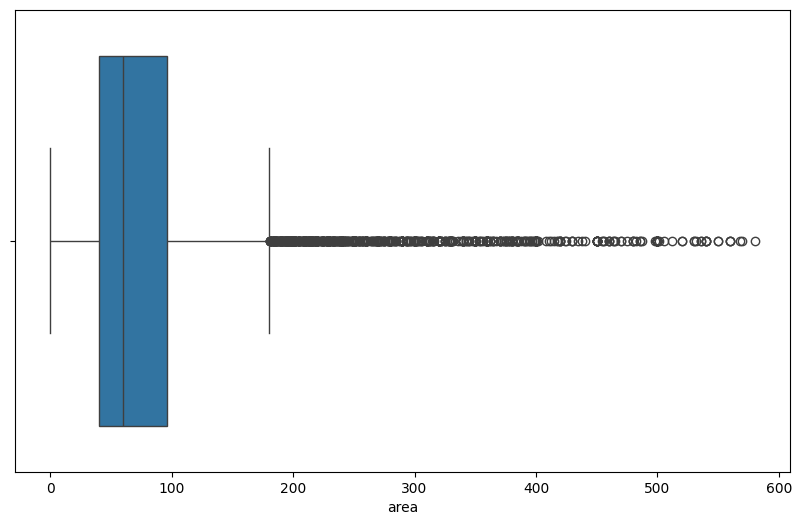

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_imoveis['area'])
df_imoveis.area.describe()

In [20]:
df_imoveis[df_imoveis.rent == 500]

,address,district,area,bedrooms,garage,type,rent,total
51,Rua Tanque Velho,Vila Nivi,45,1,0,Casa,500,551
1188,Viela Renaldo Laporta,Vila Aurora (zona Norte),30,1,0,Casa,500,521
4741,Rua Manoel Oliveira Gonçalves,Jardim Jaçanã,30,1,0,Casa,500,509
5901,Rua Manuel José Rodrigues,Sacoma,40,1,0,Casa,500,521
6428,Rua Eugênia S Vitale,Taboão,30,1,0,Studio e kitnet,500,594
7420,Rua Manuel José Rodrigues,Sacoma,20,1,0,Casa,500,521
10559,Rua Arraial de São Bartolomeu,Vila Carmosina,70,2,0,Casa,500,821


## Limpeza dos dados


In [21]:
print(f'Imóvel de corte: {df_imoveis.iloc[7420]}')
df_imoveis = df_imoveis[df_imoveis.area >= 20]
# Removendo outliers
df_imoveis = df_imoveis[df_imoveis.area <= 120]
df_imoveis.describe()

Imóvel de corte: address     Rua Manuel José Rodrigues
district                       Sacoma
area                               20
bedrooms                            1
garage                              0
type                             Casa
rent                              500
total                             521
Name: 7420, dtype: object


,area,bedrooms,garage,rent,total
count,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000
mean,57.066971,1.704627,0.731055,2536.770537,3206.170664
std,23.658929,0.712079,0.724017,1679.215365,2076.976287
min,20.000000,0.000000,0.000000,500.000000,509.000000
25%,39.000000,1.000000,0.000000,1480.000000,1834.250000
50%,52.000000,2.000000,1.000000,2100.000000,2700.000000
75%,70.000000,2.000000,1.000000,3000.000000,3961.000000
max,120.000000,5.000000,6.000000,25000.000000,26710.000000


count    9422.000000
mean       57.066971
std        23.658929
min        20.000000
25%        39.000000
50%        52.000000
75%        70.000000
max       120.000000
Name: area, dtype: float64

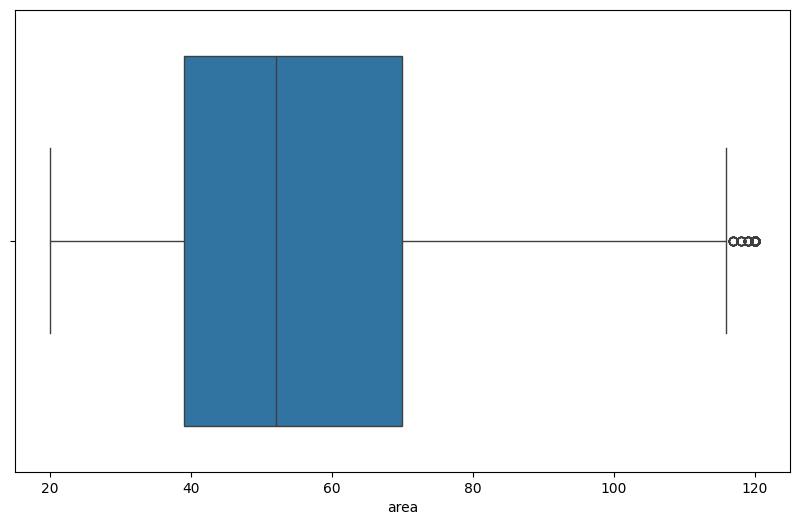

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_imoveis['area'])
df_imoveis.area.describe()

In [23]:
colunas_categoricas = df_imoveis.select_dtypes(include=['object','category']).columns
print(colunas_categoricas)
for col in colunas_categoricas:
    print(f'{col}{df_imoveis[col].unique().shape}')

Index(['address', 'district', 'type'], dtype='object')
address(4310,)
district(1100,)
type(4,)


In [24]:
#Limpa os espaços dos valores
for col in colunas_categoricas:
    df_imoveis.loc[:, col] = df_imoveis[col].str.strip()

In [25]:
# Exibe a quantidade de valores unicos das colunas categóricas
print(colunas_categoricas)
for col in colunas_categoricas:
    print(f'{col}{df_imoveis[col].unique().shape}')

Index(['address', 'district', 'type'], dtype='object')
address(4310,)
district(1089,)
type(4,)


In [26]:
#Verifica se tem lixo nos valores das colunas categoricas
tem_lixo = [col for col in colunas_categoricas if df_imoveis[col].str.contains('\\?').any()]
print(tem_lixo)

df_imoveis.isna().sum()

[]


address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

In [27]:
# Criação de coluna de metro quadrado
df_imoveis["price_m2"] = (df_imoveis["total"]  / df_imoveis["area"])

In [28]:
# Remoção das coluna rent e total, será utilizado somente a coluna price_m2 como target para o modelo
df_imoveis = df_imoveis.drop(columns=['rent','total'], axis=1)

In [29]:
df_imoveis

,address,district,area,bedrooms,garage,type,price_m2
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,139.952381
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,34.892857
5,Rua Domingos Paiva,Brás,50,2,1,Apartamento,91.740000
6,Rua Guararapes,Brooklin Paulista,72,2,1,Apartamento,72.041667
7,Avenida Cásper Líbero,Centro,26,1,0,Studio e kitnet,86.307692
...,...,...,...,...,...,...,...
11645,Avenida João Dias,Santo Amaro,70,2,0,Apartamento,44.514286
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,61.468085
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,65.083333
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,134.210526


## Criação de coluna de discretização do valor do metro quadrado do aluguel

In [30]:
df_imoveis.price_m2.describe()

count    9422.000000
mean       60.049788
std        36.575302
min         7.616667
25%        36.526880
50%        50.502941
75%        72.689732
max      1112.916667
Name: price_m2, dtype: float64

In [33]:
# Definindo os limites (bins) e os rótulos das categorias
bins = [9, 37, 52, 75, 1115]
labels = ['Baixo', 'Medio', 'Alto', 'Muito Alto']

# Usa pd.cut() para categorizar os preços
df_imoveis['price_level'] = pd.cut(
    df_imoveis['price_m2'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

print("\nDataFrame com a nova coluna categórica:")
print(df_imoveis.head())


DataFrame com a nova coluna categórica:
                 address           district  area  bedrooms  garage  \
0             Rua Herval         Belenzinho    21         1       0   
3       Rua Júlio Sayago            Vila Ré    56         2       2   
5     Rua Domingos Paiva               Brás    50         2       1   
6         Rua Guararapes  Brooklin Paulista    72         2       1   
7  Avenida Cásper Líbero             Centro    26         1       0   

                 type    price_m2 price_level  
0     Studio e kitnet  139.952381  Muito Alto  
3  Casa em condomínio   34.892857       Baixo  
5         Apartamento   91.740000  Muito Alto  
6         Apartamento   72.041667        Alto  
7     Studio e kitnet   86.307692  Muito Alto  


In [ ]:
#Removendo a coluna do preço do metro quadrado, foi usada apenas para discretizar o target
df_imoveis = df_imoveis.drop('price_m2', axis=1)

In [35]:
df_imoveis

,address,district,area,bedrooms,garage,type,price_level
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,Muito Alto
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,Baixo
5,Rua Domingos Paiva,Brás,50,2,1,Apartamento,Muito Alto
6,Rua Guararapes,Brooklin Paulista,72,2,1,Apartamento,Alto
7,Avenida Cásper Líbero,Centro,26,1,0,Studio e kitnet,Muito Alto
...,...,...,...,...,...,...,...
11645,Avenida João Dias,Santo Amaro,70,2,0,Apartamento,Medio
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,Alto
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,Alto
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,Muito Alto


## Distribuição dos dados

In [36]:
#Exibe a Moda das colunas calegóricas
for col in colunas_categoricas: print(f'A Moda da coluna "{col}" é "{df_imoveis[col].mode()[0]}"')

A Moda da coluna "address" é "Rua da Consolação"
A Moda da coluna "district" é "Bela Vista"
A Moda da coluna "type" é "Apartamento"


In [37]:
# Exibe os 5 primeiros valores das colunas categoricas
for col in colunas_categoricas: print(f'{df_imoveis[col].value_counts()[:5]}\n')

address
Rua da Consolação                  44
Rua Bela Cintra                    35
Avenida Brigadeiro Luís Antônio    35
Avenida Ipiranga                   31
Avenida Nove de Julho              28
Name: count, dtype: int64

district
Bela Vista         331
Vila Mariana       186
Centro             162
Jardim Paulista    149
Pinheiros          147
Name: count, dtype: int64

type
Apartamento           6380
Casa                  1583
Studio e kitnet       1293
Casa em condomínio     166
Name: count, dtype: int64



## Divisão entre previsores (X) e classe (y)

In [41]:
# Previsores (features)
X_imoveis = df_imoveis.iloc[:, 0:6]
print(f'Previsores:\n{X_imoveis}\n')

Previsores:
                       address                 district  area  bedrooms  \
0                   Rua Herval               Belenzinho    21         1   
3             Rua Júlio Sayago                  Vila Ré    56         2   
5           Rua Domingos Paiva                     Brás    50         2   
6               Rua Guararapes        Brooklin Paulista    72         2   
7        Avenida Cásper Líbero                   Centro    26         1   
...                        ...                      ...   ...       ...   
11645        Avenida João Dias              Santo Amaro    70         2   
11652  Avenida Adolfo Pinheiro              Santo Amaro    94         2   
11654         Rua Abílio Borin         Jardim Caravelas    84         1   
11655        Rua Forte William  Jardim Fonte do Morumbi    76         1   
11656      Rua Alexandre Dumas              Santo Amaro   110         3   

       garage                type  
0           0     Studio e kitnet  
3           2  

In [42]:
# Classe (target)
y_imoveis = df_imoveis.iloc[:,6]
print(f'Classe:\n{y_imoveis}')

Classe:
0        Muito Alto
3             Baixo
5        Muito Alto
6              Alto
7        Muito Alto
            ...    
11645         Medio
11652          Alto
11654          Alto
11655    Muito Alto
11656         Baixo
Name: price_level, Length: 9422, dtype: category
Categories (4, object): ['Baixo' < 'Medio' < 'Alto' < 'Muito Alto']


##  Codificação de variáveis categóricas

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [44]:
X_imoveis

,address,district,area,bedrooms,garage,type
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio
5,Rua Domingos Paiva,Brás,50,2,1,Apartamento
6,Rua Guararapes,Brooklin Paulista,72,2,1,Apartamento
7,Avenida Cásper Líbero,Centro,26,1,0,Studio e kitnet
...,...,...,...,...,...,...
11645,Avenida João Dias,Santo Amaro,70,2,0,Apartamento
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento


In [45]:
# Identificar colunas categóricas e numéricas
col_categoricas = ['address', 'district', 'type', 'bedrooms', 'garage']
cols_numericas = ['area']

In [46]:
#Substitui os espaços dos valores por underline
for col in colunas_categoricas:
    df_imoveis.loc[:, col] = df_imoveis[col].str.replace(' ','_')

In [47]:
# Cria o transformer
preprocessador = ColumnTransformer(transformers=[('num', StandardScaler(), cols_numericas),
                                                 ('cat', OneHotEncoder(), col_categoricas)])

In [48]:
#Transforma os dados
matriz_csr = preprocessador.fit_transform(df_imoveis)
matriz_csr

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 56532 stored elements and shape (9422, 5417)>

In [49]:
# Define o nome das novas colunas criadas
colunas_novas = (
      [f"{col}_scaled" for col in cols_numericas] +
          list(preprocessador.named_transformers_['cat'].get_feature_names_out(col_categoricas))
          )

print(colunas_novas)

['area_scaled', 'address_25_de_Março', 'address_Alameda_Afonso_Schmidt', 'address_Alameda_Amazonas', 'address_Alameda_Barros', 'address_Alameda_Barão_de_Limeira', 'address_Alameda_Barão_de_Piracicaba', 'address_Alameda_Campestre', 'address_Alameda_Campinas', 'address_Alameda_Casa_Branca', 'address_Alameda_Casa_Branca_-_Jardim_Paulista,_São_Paulo_-_Sp,_Brasil', 'address_Alameda_Cauaxi', 'address_Alameda_Cleveland', 'address_Alameda_Conde_de_Porto_Alegre', 'address_Alameda_Dino_Bueno', 'address_Alameda_Eduardo_Prado', 'address_Alameda_Fernão_Cardim', 'address_Alameda_Franca', 'address_Alameda_Glete', 'address_Alameda_Grajau', 'address_Alameda_Grajaú', 'address_Alameda_Iraé', 'address_Alameda_Itapecuru', 'address_Alameda_Itu', 'address_Alameda_Itupiranga', 'address_Alameda_Jauaperi', 'address_Alameda_Jaú', 'address_Alameda_Joaquim_Eugênio_de_Lima', 'address_Alameda_Lorena', 'address_Alameda_Madeira', 'address_Alameda_Mamoré', 'address_Alameda_Mauro_Zelante', 'address_Alameda_Ministro_Roch

In [50]:
# Convertendo Matriz Espassa (CSR)
matriz_densa = matriz_csr.toarray()

In [51]:
# Gerar DataFrame final
df_transformado = pd.DataFrame(matriz_densa, columns=colunas_novas)
df_transformado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9422 entries, 0 to 9421
Columns: 5417 entries, area_scaled to garage_6
dtypes: float64(5417)
memory usage: 389.4 MB


In [52]:
# Escalonamento do dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_df_transformado = scaler.fit_transform(df_transformado)
X_df_transformado[0]

array([-1.52453586, -0.01030271, -0.01457101, ..., -0.03571049,
       -0.02304245, -0.01784671])

## Balanceamento dos dados/Divisão da Base em treinamento, teste

In [58]:
y_imoveis.value_counts()

price_level
Medio         2503
Baixo         2430
Alto          2257
Muito Alto    2231
Name: count, dtype: int64

In [88]:
y_imoveis.info()

<class 'pandas.core.series.Series'>
Index: 9422 entries, 0 to 11656
Series name: price_level
Non-Null Count  Dtype   
--------------  -----   
9421 non-null   category
dtypes: category(1)
memory usage: 83.0 KB


In [89]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_df_transformado, y_imoveis, 
                                                                              test_size = 0.25, random_state =7)

In [90]:
print('Shape Treinamento ( X, y)')
print(X_treinamento.shape, y_treinamento.shape)
print('Shape Teste (X, y)')
print(X_teste.shape, y_teste.shape)

Shape Treinamento ( X, y)
(7066, 5417) (7066,)
Shape Teste (X, y)
(2356, 5417) (2356,)


In [91]:
X_treinamento

array([[-0.72141376, -0.01030271, -0.01457101, ..., -0.03571049,
        -0.02304245, -0.01784671],
       [-0.72141376, -0.01030271, -0.01457101, ..., -0.03571049,
        -0.02304245, -0.01784671],
       [ 0.54667376, -0.01030271, -0.01457101, ..., -0.03571049,
        -0.02304245, -0.01784671],
       ...,
       [-1.22864877, -0.01030271, -0.01457101, ..., -0.03571049,
        -0.02304245, -0.01784671],
       [-0.21417875, -0.01030271, -0.01457101, ..., -0.03571049,
        -0.02304245, -0.01784671],
       [ 0.54667376, -0.01030271, -0.01457101, ..., -0.03571049,
        -0.02304245, -0.01784671]])

## Treinamento de Modelos

In [98]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report, accuracy_score

def model_analyser(modelo, X_treinamento, y_treinamento, X_teste, y_teste):
    modelo.fit(X_treinamento, y_treinamento)
    previsoes = modelo.predict(X_teste)
    print('Previsões:')
    print(f'{previsoes = }\n')
    print(f'{y_teste = }\n\n')

    y_converted = y_teste.astype('str')

    print('Relatório de Classificação:')
    print(classification_report(y_converted, previsoes))

    accuracy = accuracy_score(y_converted, previsoes)
    print(f'Acurácia: {accuracy}')

    print('Matriz de Confusão:')
    cm = ConfusionMatrix(modelo)
    cm.fit(X_treinamento, y_treinamento)
    cm.score(X_teste, y_converted)

    return accuracy

### Naïve Bayes

Previsões:
previsoes = array(['Medio', 'Muito Alto', 'Baixo', ..., 'Muito Alto', 'Alto', 'Baixo'],
      dtype='<U10')

y_teste = 4445    Muito Alto
6518         Medio
3637         Baixo
2932         Baixo
7757         Baixo
           ...    
1337         Medio
3388          Alto
3930          Alto
2591          Alto
5956          Alto
Name: price_level, Length: 2356, dtype: category
Categories (4, object): ['Baixo' < 'Medio' < 'Alto' < 'Muito Alto']


Relatório de Classificação:
              precision    recall  f1-score   support

        Alto       0.38      0.36      0.37       575
       Baixo       0.64      0.27      0.38       588
       Medio       0.40      0.26      0.31       636
  Muito Alto       0.42      0.87      0.57       556
         nan       0.00      0.00      0.00         1

    accuracy                           0.43      2356
   macro avg       0.37      0.35      0.32      2356
weighted avg       0.46      0.43      0.40      2356

Acurácia: 0.4286926994906

/home/claudiosampaio/.pyenv/versions/.notebooks/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/claudiosampaio/.pyenv/versions/.notebooks/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/claudiosampaio/.pyenv/versions/.notebooks/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

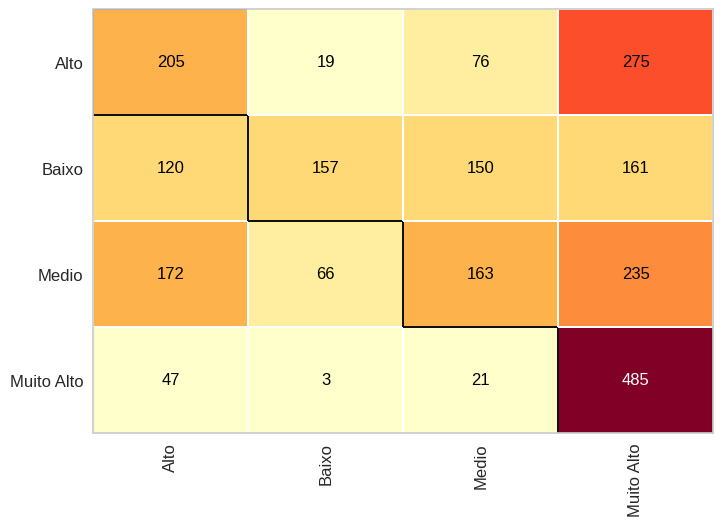

In [99]:
from sklearn.naive_bayes import GaussianNB
modelo_naive_bayes = GaussianNB()
nb_acc = model_analyser(modelo_naive_bayes, X_treinamento, y_treinamento, X_teste, y_teste)

In [ ]:
#Salvando previsores e classe
# salvar X_df e y_df
import pickle
with open('./dados/imoveis.pkl', mode = 'wb') as f:
  pickle.dump([X_imoveis, y_imoveis], f)

In [ ]:
#Carrega dos dados salvos
import pickle
with open('./dados/imoveis.pkl', mode='rb') as f:
    previsores, classe = pickle.load(f)